##  Google Play Store apps and reviews
<p>Comprehensive analysis of the Android app market by comparing over more than ten thousand apps in Google Play across different categories. We'll look for insights in the data to devise strategies to drive growth and retention.</p>

<p>Let's take a look at the data, which consists of two files:</p>
<ul>
<li><code>apps.csv</code>: contains all the details of the applications on Google Play. There are 13 features that describe a given app.</li>
<li><code>user_reviews.csv</code>: contains 100 reviews for each app, <a href="https://www.androidpolice.com/2019/01/21/google-play-stores-redesigned-ratings-and-reviews-section-lets-you-easily-filter-by-star-rating/">most helpful first</a>. The text in each review has been pre-processed and attributed with three new features: Sentiment (Positive, Negative or Neutral), Sentiment Polarity and Sentiment Subjectivity.</li>
</ul>

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('googleplaystore.csv')


In [3]:
data.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

# Perform Exploratory Data Analysis

In [4]:
print("Shape Dataset:",data.shape)


Shape Dataset: (10841, 13)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [7]:
data.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [8]:
# Drop the rows where all elements are missing.
data.dropna(how='all')
print("Shape Dataset:",data.shape)

Shape Dataset: (10841, 13)


In [9]:
#Replace null values

#data.replace(np.nan,'0',inplace = True)

#Check the changes now
#data.isnull().sum()

In [10]:
# Detect if there is duplication in App
df1=data.groupby(["App"])["App"].count().reset_index(name="count")
df1[(df1['count']>1)]

App  count
7                                 10 Best Foods for You      2
20                           1800 Contacts - Lens Store      2
29                           2017 EMRA Antibiotic Guide      2
35                         21-Day Meditation Experience      2
57                              365Scores - Live Scores      2
...                                                 ...    ...
9585                     stranger chat - anonymous chat      2
9592                        textPlus: Free Text & Calls      2
9597  theScore: Live Sports Scores, News, Stats & Vi...      5
9602                           trivago: Hotels & Travel      3
9620                     wetter.com - Weather and Radar      2

[798 rows x 2 columns]

In [11]:
data.duplicated().sum()

483

In [12]:
# Drop duplicates
apps = data.drop_duplicates()

In [13]:
# Print the total number of apps
print('Total number of apps in the dataset = ', len(apps))

Total number of apps in the dataset =  10358


In [14]:
# Have a look at a random sample of 5 rows
n = 5
apps.sample(n)

App        Category  Rating Reviews  \
1211               OpenRice  FOOD_AND_DRINK     3.6   14952   
7012   Project Fi by Google           TOOLS     4.6    7342   
3911           YouTube Kids          FAMILY     4.5  469851   
1177  Easy and Fast Recipes  FOOD_AND_DRINK     NaN      95   
3574            Cloud Print    PRODUCTIVITY     4.1  282460   

                    Size      Installs  Type Price Content Rating  \
1211                 39M    1,000,000+  Free     0       Everyone   
7012  Varies with device    1,000,000+  Free     0       Everyone   
3911  Varies with device   50,000,000+  Free     0       Everyone   
1177                 12M       50,000+  Free     0       Everyone   
3574  Varies with device  500,000,000+  Free     0       Everyone   

                           Genres     Last Updated         Current Ver  \
1211                 Food & Drink     June 8, 2018               5.8.5   
7012                        Tools    July 30, 2018  Varies with device   
3911  Entertainment;Music & Video   August 3, 2018              3.43.3   
1177                 Food & Drink  January 6, 2018               3.0.1   
3574                 Productivity     May 23, 2018  Varies with device   

             Android Ver  
1211          4.1 and up  
7012          5.1 and up  
3911          4.1 and up  
1177          2.3 and up  
3574  Varies with device

In [15]:
import plotly.express as px

fig=px.histogram(apps,x=['Installs'])
fig.show()

In [16]:
# 3. Drop the rows where all elements are Outliers.
apps_without_outlier = apps[apps['Installs'] != 'Free']

In [17]:
fig=px.histogram(apps_without_outlier,x=['Installs'])
fig.show()

In [18]:
# Detect if there is duplication in App
df1=apps_without_outlier.groupby(["App"])["App"].count().reset_index(name="count")
df1[(df1['count']>1)]

App  count
57                              365Scores - Live Scores      2
101                                         8 Ball Pool      7
104                     95Live -SG#1 Live Streaming App      2
114               A&E - Watch Full Episodes of TV Shows      2
152                       AC - Tips & News for Android™      2
...                                                 ...    ...
9583                                         slither.io      5
9584                     stranger chat - anonymous chat      2
9591                        textPlus: Free Text & Calls      2
9596  theScore: Live Sports Scores, News, Stats & Vi...      2
9619                     wetter.com - Weather and Radar      2

[523 rows x 2 columns]

In [19]:
apps = df1.drop_duplicates()
apps.shape

(9659, 2)

In [20]:
apps['Category']=apps_without_outlier['Category']
apps['Size']=apps_without_outlier['Size']
apps['Price']=apps_without_outlier['Price']
apps['Installs']=apps_without_outlier['Installs']
apps['Rating']=apps_without_outlier['Rating']
apps['Type']=apps_without_outlier['Type']
apps['Reviews']=apps_without_outlier['Reviews']

apps.shape

(9659, 9)

In [21]:
apps = apps.drop(['count'],axis=1)
apps.shape

(9659, 8)

In [22]:
apps.isna().sum()

App            0
Category     481
Size         481
Price        481
Installs     481
Rating      1650
Type         482
Reviews      481
dtype: int64

In [23]:
apps=apps.dropna(axis=0)
apps.isna().sum()

App         0
Category    0
Size        0
Price       0
Installs    0
Rating      0
Type        0
Reviews     0
dtype: int64

Unique values

In [24]:
apps['App'].unique()

array(['"i DT" Fútbol. Todos Somos Técnicos.',
       '+Download 4 Instagram Twitter', '- Free Comics - Comic Apps', ...,
       '乐屋网: Buying a house, selling a house, renting a house', '哈哈姆特不EY',
       '日本AV历史'], dtype=object)

In [25]:
apps_without_outlier['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

## Data cleaning
<p>The three features that we will be working with most frequently henceforth are <code>Installs</code>, <code>Size</code>, and <code>Price</code>. A careful glance of the dataset reveals that some of these columns mandate data cleaning in order to be consumed by code we'll write later. Specifically, the presence of special characters (<code>, $ +</code>) and letters (<code>M k</code>) in the <code>Installs</code>, <code>Size</code>, and <code>Price</code> columns make their conversion to a numerical data type difficult. Let's clean by removing these and converting each column to a numeric type.</p>

**Data cleaning and prepare our data to be consumed in our analyis later**
<p>The four features that we will be working with most frequently henceforth are <code>Installs</code>, <code>Size</code>, <code>Rating</code> and <code>Price</code>. The <code>info()</code> function (from the previous task)  told us that <code>Installs</code> and <code>Price</code> columns are of type <code>object</code> and not <code>int64</code> or <code>float64</code> as we would expect. This is because the column contains some characters more than just [0,9] digits. Ideally, we would want these columns to be numeric as their name suggests. <br>
Hence, we now proceed to data cleaning and prepare our data to be consumed in our analyis later. Specifically, the presence of special characters (<code>, $ +</code>) in the <code>Installs</code> and <code>Price</code> columns make their conversion to a numerical data type difficult.</p>

In [26]:
apps_without_outlier.shape

(10357, 13)

In [27]:
# List of characters to remove
chars_to_remove = ['+',',','$']
# List of column names to clean
cols_to_clean = ['Installs','Price','Rating']
# Loop for each column
for col in cols_to_clean:
    # Replace each character with an empty string
    #apps[cols_to_clean].replace(chars_to_remove,'')
    for char in chars_to_remove:
        apps[col] = apps[col].astype(str).str.replace(char, '')
    # Convert col to numeric
    apps[col] = pd.to_numeric(apps[col]) 

C:\Users\Dell\AppData\Local\Temp\ipykernel_1848\3527659672.py:10: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [28]:
#2. Convert 'Sizes' to MB.
apps['Size'] = apps['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
apps['Size'] = apps['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
apps['Size'] = apps['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
apps['Size'] = apps['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1024 if 'k' in str(x) else x)
apps['Size'] = apps['Size'].apply(lambda x: float(x))

#to Check the Data Type in Pandas DataFrame
print(apps['Size'].dtypes)

float64


In [29]:
#4. Convert 'Reviews' to Int.
apps['Reviews'] = apps['Reviews'].apply(lambda x: int(x))
#to Check the Data Type in Pandas DataFrame
print(apps['Reviews'].dtypes)

int64


# Correlation Matrix

<AxesSubplot:>

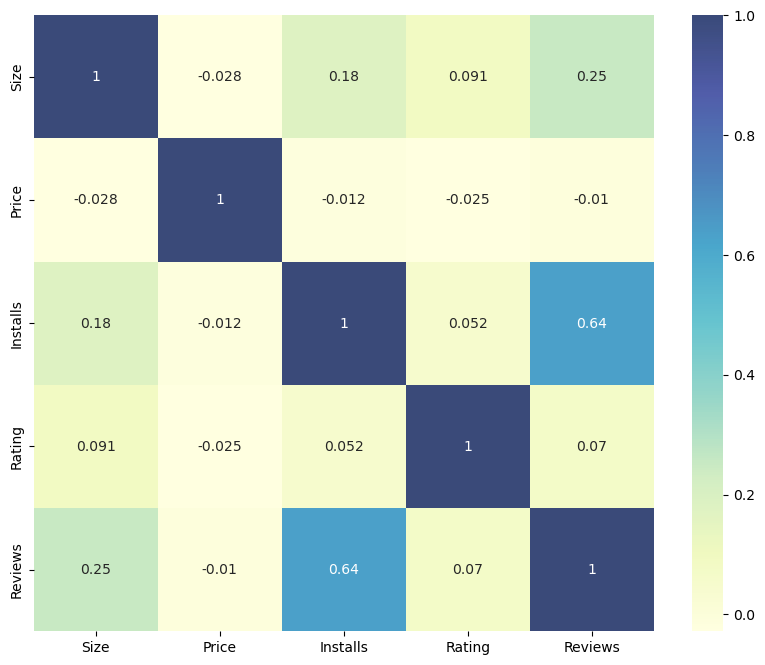

In [30]:
plt.figure(figsize=(10,8))
sns.heatmap(apps.corr(),cmap ="YlGnBu",annot=True, alpha=.8)

## 3. Exploring app categories
<p>With more than 1 billion active users in 190 countries around the world, Google Play continues to be an important distribution platform to build a global audience. For businesses to get their apps in front of users, it's important to make them more quickly and easily discoverable on Google Play. To improve the overall search experience, Google has introduced the concept of grouping apps into categories.</p>
<p>This brings us to the following questions:</p>
<ul>
<li>Which category has the highest share of (active) apps in the market? </li>
<li>Is any specific category dominating the market?</li>
<li>Which categories have the fewest number of apps?</li>
</ul>


In [31]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [32]:
# Count the number of apps in each 'Category' and sort them in descending order
num_apps_in_category = apps['Category'].value_counts().sort_values(ascending = False)
print(num_apps_in_category)

data = [go.Bar(
        x = num_apps_in_category.index, # index = category name
        y = num_apps_in_category.values, # value = count
)]

plotly.offline.iplot(data)

FAMILY                 1488
GAME                    986
TOOLS                   639
PRODUCTIVITY            303
MEDICAL                 293
PHOTOGRAPHY             284
FINANCE                 280
COMMUNICATION           278
PERSONALIZATION         275
LIFESTYLE               271
HEALTH_AND_FITNESS      249
BUSINESS                235
SPORTS                  231
SOCIAL                  209
SHOPPING                196
NEWS_AND_MAGAZINES      183
TRAVEL_AND_LOCAL        180
BOOKS_AND_REFERENCE     162
DATING                  156
VIDEO_PLAYERS           145
EDUCATION               129
ENTERTAINMENT           111
MAPS_AND_NAVIGATION     108
FOOD_AND_DRINK          105
AUTO_AND_VEHICLES        67
HOUSE_AND_HOME           66
WEATHER                  66
LIBRARIES_AND_DEMO       62
ART_AND_DESIGN           62
COMICS                   57
PARENTING                50
EVENTS                   43
BEAUTY                   40
Name: Category, dtype: int64


In [33]:


# Print the total number of unique categories
num_categories = len(apps_without_outlier['Category'].unique())
print('Number of categories = ', num_categories)

# Count the number of apps in each 'Category' and sort them in descending order
num_apps_in_category = apps['Category'].value_counts().sort_values(ascending = False)

data = [go.Bar(
        x = num_apps_in_category.index, # index = category name
        y = num_apps_in_category.values, # value = count
)]

plotly.offline.iplot(data)

Number of categories =  33


We will see that there are 33 unique app categories present in our dataset. Family and Game apps have the highest market prevalence. Interestingly, Tools, Business and Medical apps are also at the top.

In [34]:
db_Category_Free = apps[apps['Type']=="Free"]['Category'].value_counts().sort_values(ascending=False).reset_index()
db_Category_Paid = apps[apps['Type']=="Paid"]['Category'].value_counts().sort_values(ascending=False).reset_index()

df_suffix = pd.merge(db_Category_Free, db_Category_Paid, left_on='index',right_on='index',how='outer')
df_suffix = df_suffix.rename(columns = {'index':'Category'})
df_suffix = df_suffix.rename(columns = {'Category_x':'Free'})
df_suffix = df_suffix.rename(columns = {'Category_y':'Paid'})

C:\Users\Dell\AppData\Local\Temp\ipykernel_1848\3358382228.py:5: UserWarning:

FixedFormatter should only be used together with FixedLocator



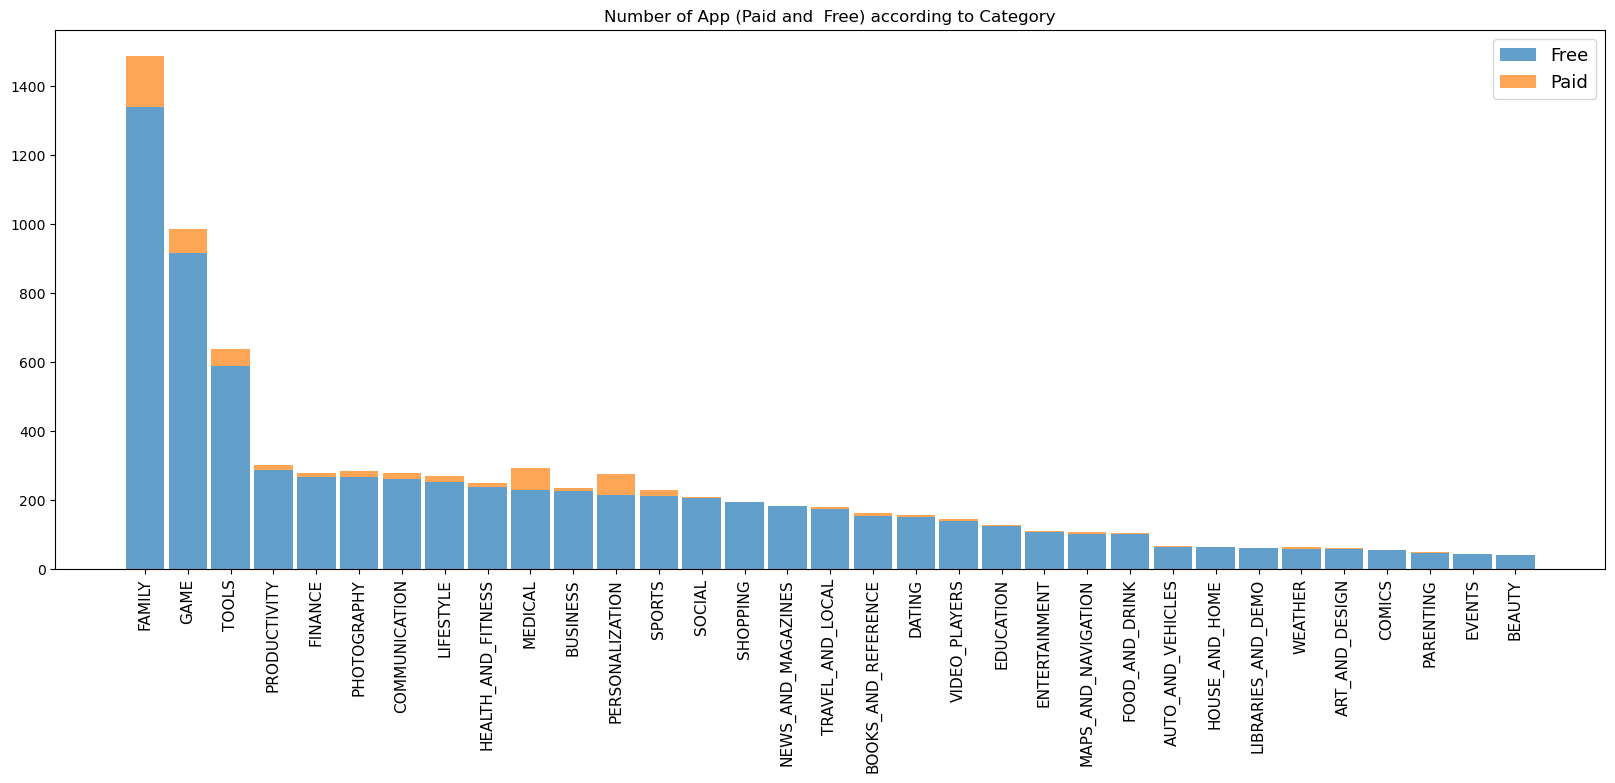

In [35]:
fig, ax = plt.subplots(figsize=(20,7))
ax.bar(df_suffix['Category'], df_suffix['Free'], 0.9,  label='Free', alpha=0.7)
ax.bar(df_suffix['Category'], df_suffix['Paid'], 0.9,  bottom=df_suffix['Free'],label='Paid', alpha=0.7)

ax.set_xticklabels(df_suffix['Category'],rotation=90,fontsize='11')

ax.set_xlabel('',fontsize='17')
ax.set_ylabel('',fontsize='25')
ax.set_title('Number of App (Paid and  Free) according to Category')
ax.legend(loc=1, fontsize = '13')
plt.show()

## 4. Distribution of app ratings
<p>After having witnessed the market share for each category of apps, let's see how all these apps perform on an average. App ratings (on a scale of 1 to 5) impact the discoverability, conversion of apps as well as the company's overall brand image. Ratings are a key performance indicator of an app.</p>


In [36]:
# Average rating of apps
avg_app_rating = apps['Rating'].mean()
print('Average app rating = ', avg_app_rating)

# Distribution of apps according to their ratings
data = [go.Histogram(
        x = apps['Rating'],
        xbins = {'start': 1, 'size': 0.1, 'end' : 5}
)]

# Vertical dashed line to indicate the average app rating
layout = {'shapes': [{
              'type' :'line',
              'x0': avg_app_rating,
              'y0': 0,
              'x1': avg_app_rating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }]
          }

plotly.offline.iplot({'data': data, 'layout': layout})

Average app rating =  4.197352977899869


<p>From our research, we found that the average volume of ratings across all app categories is <code>4.19</code>. The histogram plot is skewed to the right indicating that the majority of the apps are highly rated with only a few exceptions in the low-rated apps.</p>

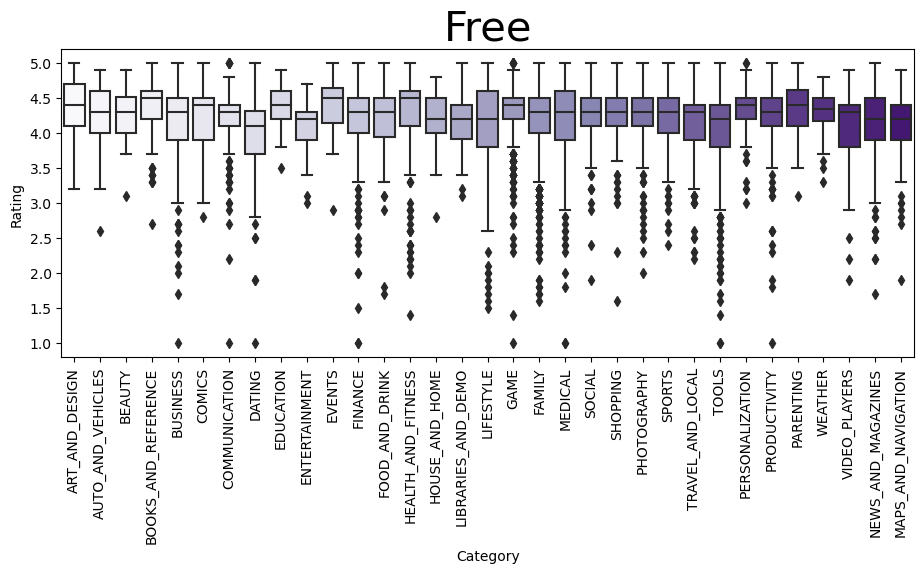

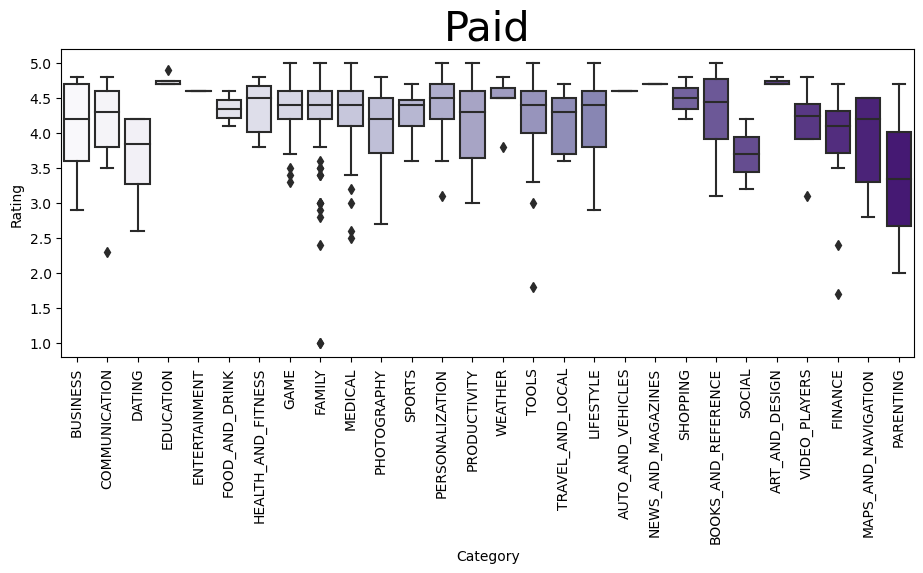

In [37]:
plt.figure(figsize=(11,4))
ax = sns.boxplot(x = apps[apps['Type']=="Free"]['Category'], y = apps['Rating'],  palette = 'Purples') #hue = df['Type']
plt.title('Free', fontsize = 30)
plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()

plt.figure(figsize=(11,4))
ax = sns.boxplot(x = apps[apps['Type']=="Paid"]['Category'], y = apps['Rating'],  palette = 'Purples') #hue = df['Type']
plt.title('Paid', fontsize = 30)
plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()

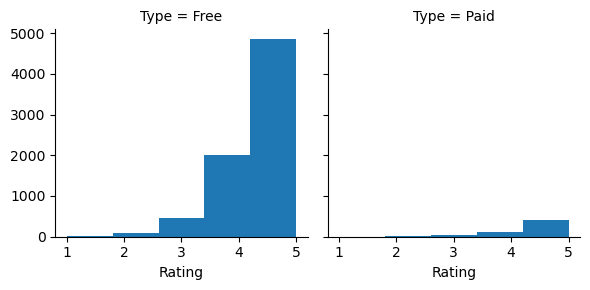

In [38]:
g = sns.FacetGrid(apps, col='Type')
g.map(plt.hist, 'Rating', bins=5)

C:\Users\Dell\AppData\Local\Temp\ipykernel_1848\2058313886.py:4: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\Dell\AppData\Local\Temp\ipykernel_1848\2058313886.py:4: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\Dell\AppData\Local\Temp\ipykernel_1848\2058313886.py:4: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\Dell\AppData\Local\Temp\ipykernel_1848\2058313886.py:4: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\Dell\AppData\Local\Temp\ipykernel_1848\2058313886.py:4: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\Dell\AppData\Local\Temp\ipykernel_1848\2058313886.py:4: UserWarning:

FixedFormatter should only be used together with FixedLocator



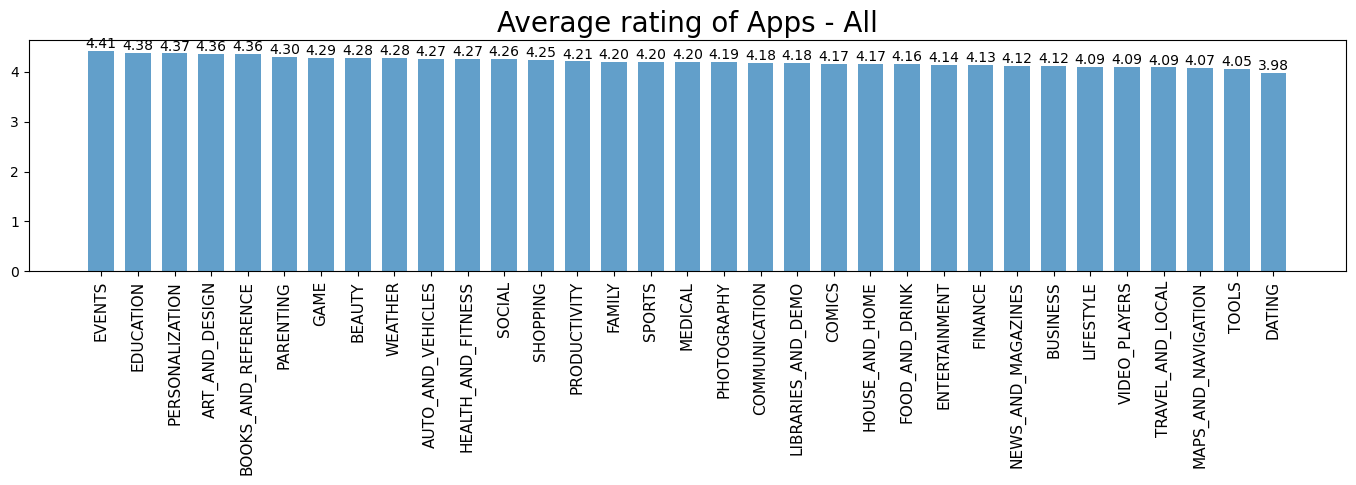

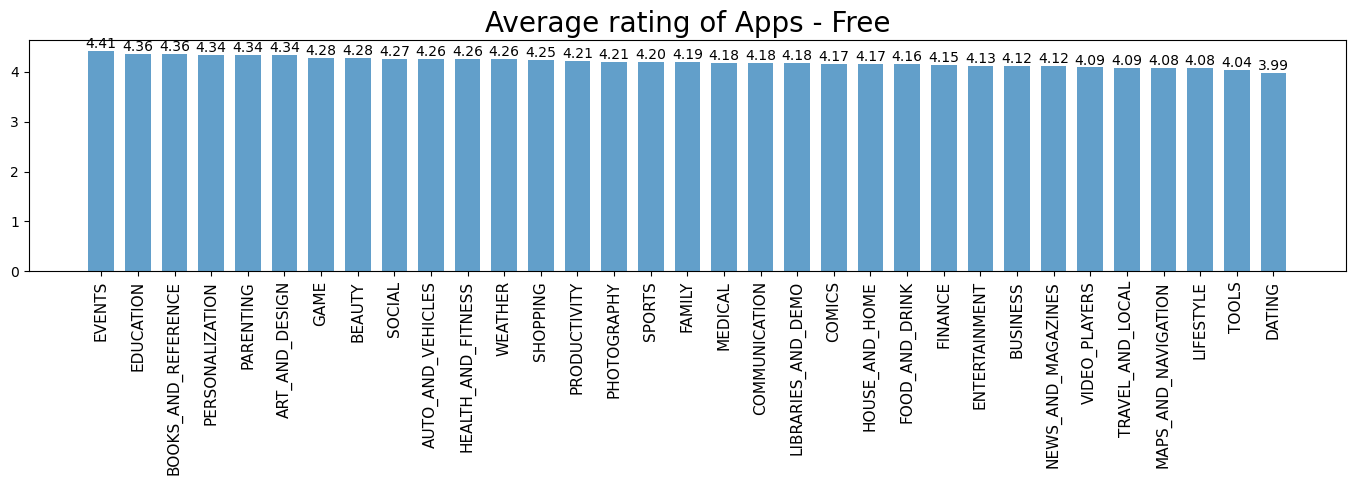

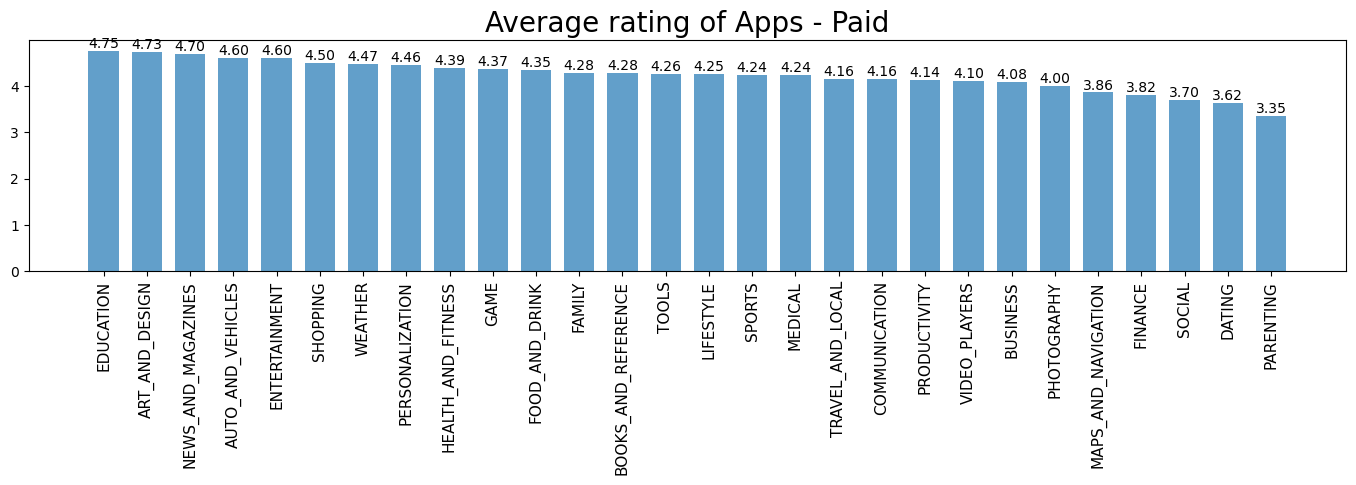

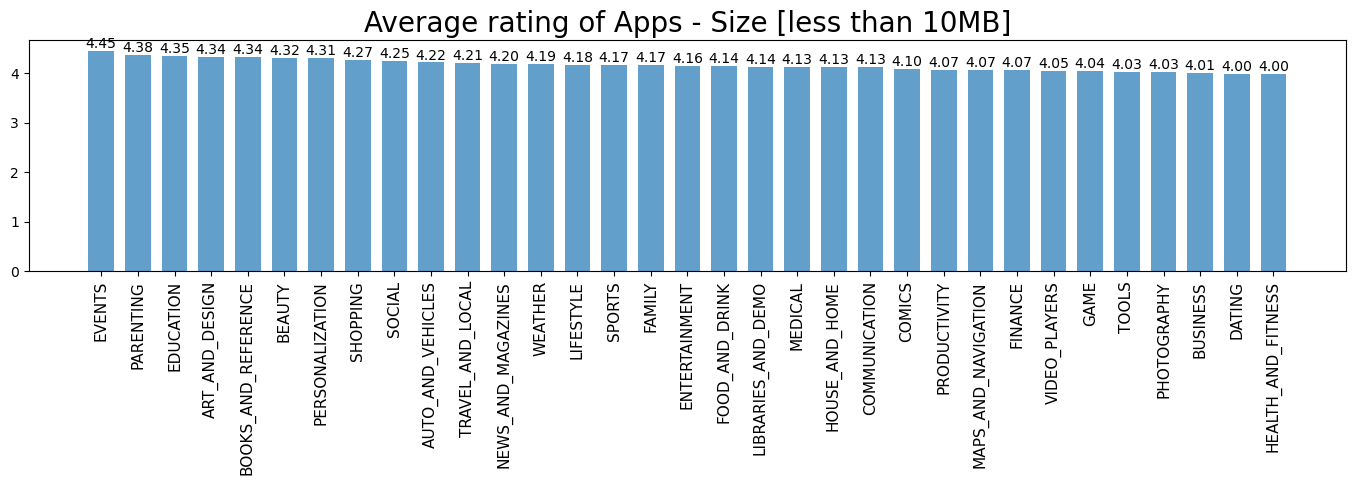

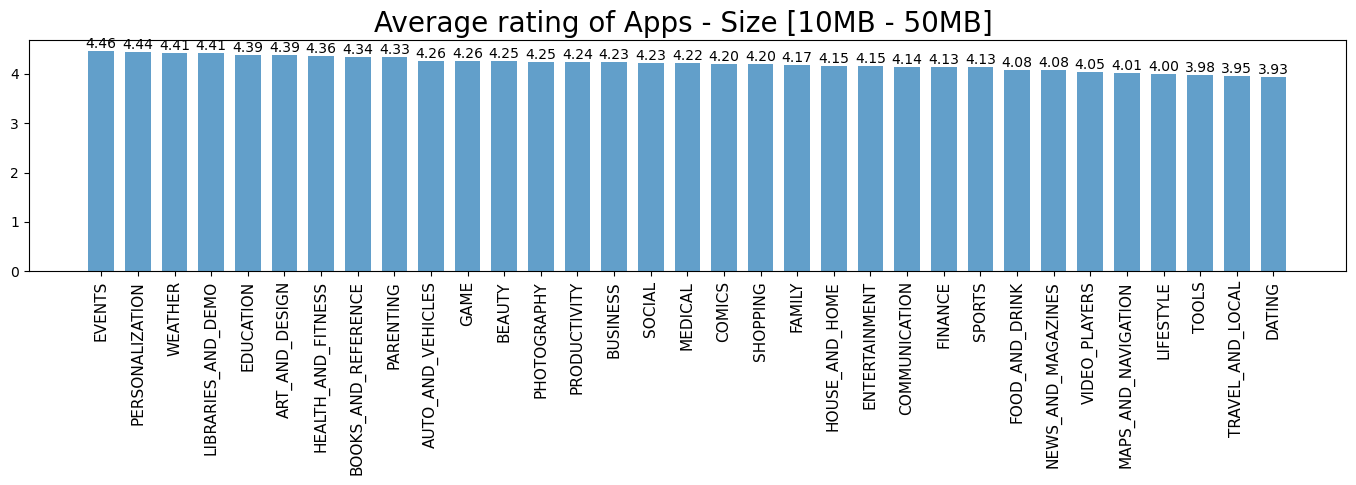

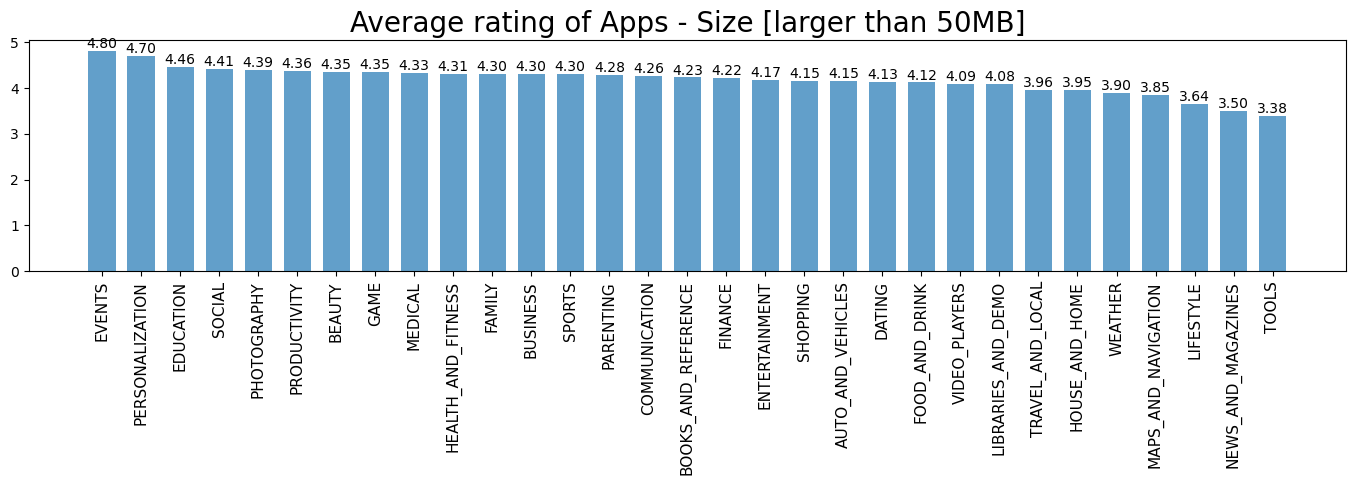

In [39]:
def Chart_D(x):
    fig, ax = plt.subplots(figsize=(17,3))
    ax.bar(x.iloc[:,0], x.iloc[:,1], 0.7,  label='Free', alpha=0.7)
    ax.set_xticklabels(x['Category'],rotation=90,fontsize='11')
    ax.set_xlabel('',fontsize='17')
    ax.set_ylabel('',fontsize='25')
    ax.set_title("Average rating of Apps - "+ x.columns[1],fontsize='20')

    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.2f}'.format(p.get_height()), (x.mean(), y), ha='center', va='bottom')
    #plt.show()

db_gr = apps.groupby(["Category"])["Rating"].mean().sort_values(ascending=False).reset_index()
db_gr = db_gr.rename(columns = {'Rating':'All'})
Chart_D(db_gr)

db_grFree = apps[apps['Type']=="Free"].groupby(["Category"])["Rating"].mean().sort_values(ascending=False).reset_index()
db_grFree = db_grFree.rename(columns = {'Rating':'Free'})
Chart_D(db_grFree)

db_grPaid = apps[apps['Type']=="Paid"].groupby(["Category"])["Rating"].mean().sort_values(ascending=False).reset_index()
db_grPaid = db_grPaid.rename(columns = {'Rating':'Paid'})
Chart_D(db_grPaid)


df_gr10=apps[apps['Size']<10].groupby(["Category"])["Rating"].mean().sort_values(ascending=False).reset_index()
df_gr10 = df_gr10.rename(columns = {'Rating':'Size [less than 10MB]'})
Chart_D(df_gr10)

df_gr1050 = apps[(apps['Size']>=10) & (apps['Size']<50)].groupby(["Category"])["Rating"].mean().sort_values(ascending=False).reset_index()
df_gr1050 = df_gr1050.rename(columns = {'Rating':'Size [10MB - 50MB] '})
Chart_D(df_gr1050)

df_gr50 = apps[apps['Size']>=50].groupby(["Category"])["Rating"].mean().sort_values(ascending=False).reset_index()
df_gr50 = df_gr50.rename(columns = {'Rating':'Size [larger than 50MB]'})
Chart_D(df_gr50)

## 5. Size and price of an app
<p>Let's now examine app size and app price. For size, if the mobile app is too large, it may be difficult and/or expensive for users to download. Lengthy download times could turn users off before they even experience your mobile app. Plus, each user's device has a finite amount of disk space. For price, some users expect their apps to be free or inexpensive. These problems compound if the developing world is part of your target market; especially due to internet speeds, earning power and exchange rates.</p>
<p>How can we effectively come up with strategies to size and price our app?</p>
<ul>
<li>Does the size of an app affect its rating? </li>
<li>Do users really care about system-heavy apps or do they prefer light-weighted apps? </li>
<li>Does the price of an app affect its rating? </li>
<li>Do users always prefer free apps over paid apps?</li>
</ul>


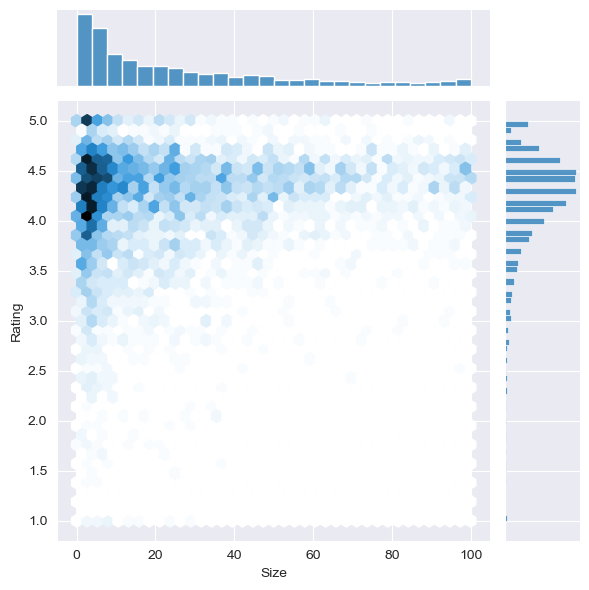

In [40]:
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

# Subset for categories with at least 250 apps
large_categories = apps.groupby('Category').filter(lambda x: len(x) >= 250).reset_index()

# Plot size vs. rating
plt1 = sns.jointplot(x = large_categories['Size'], y = large_categories['Rating'], kind = 'hex')



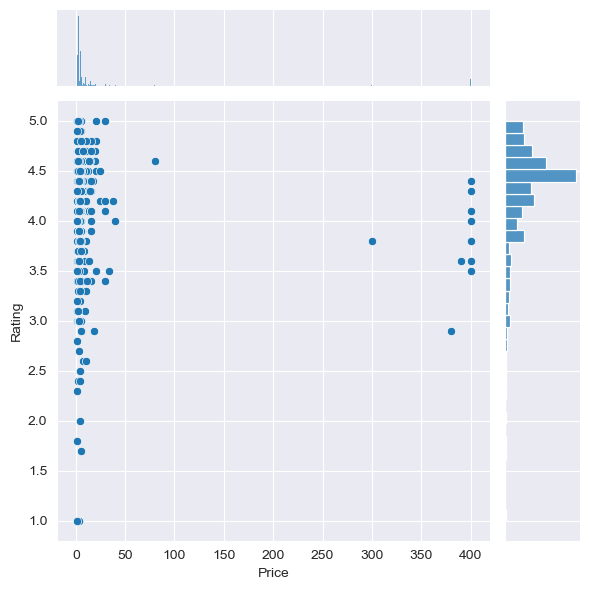

In [41]:
# Subset out apps whose type is 'Paid'
paid_apps = apps[apps['Type'] == 'Paid']

# Plot price vs. rating
plt2 = sns.jointplot(x = paid_apps['Price'], y = paid_apps['Rating'])

<p>We find that the majority of top rated apps (rating over 4) range from 2 MB to 20 MB. We also find that the vast majority of apps price themselves under \$10.</p>

# Rating Vs Size

Rating Vs Size (Free App)

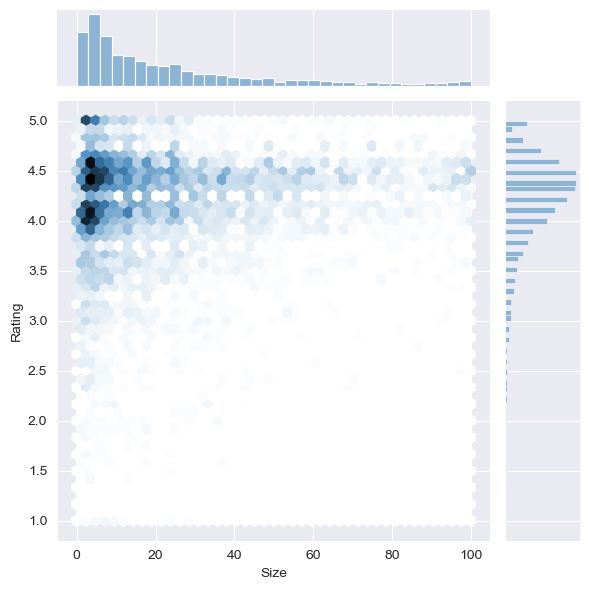

In [42]:
#sns.jointplot(data=df,x=df['Size'], y=df['Rating'], color="#1aa3dc",hue="Type", kind="kde")
sns.jointplot(x=apps[apps['Type']=="Free"]['Size'], y=apps[apps['Type']=="Free"]['Rating'], kind="hex", color="#6EA3CC")

Rating Vs Size (Paid App)

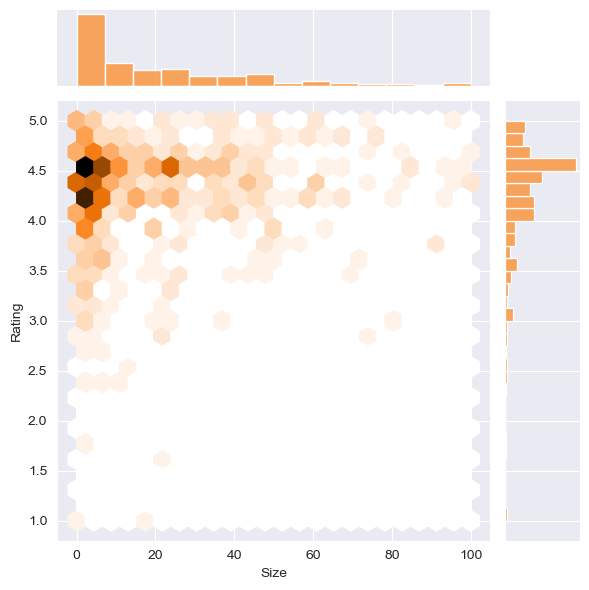

In [43]:
sns.jointplot(x=apps[apps['Type']=="Paid"]['Size'], y=apps[apps['Type']=="Paid"]['Rating'], kind="hex", color="#FC8B29")

# Rating Vs Price

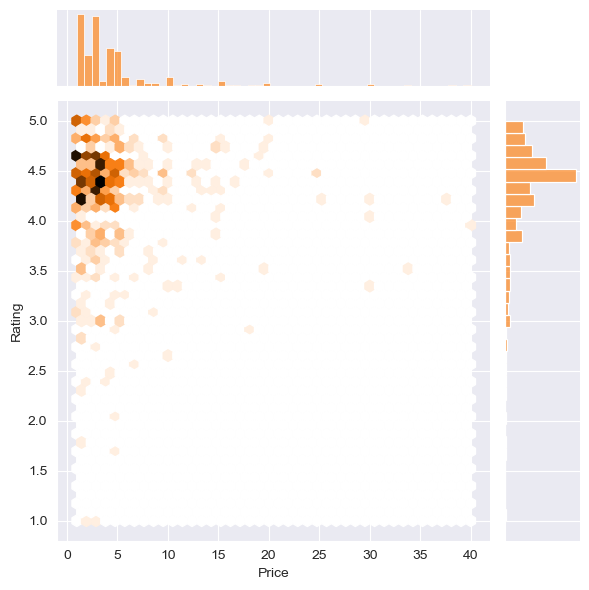

In [44]:
sns.jointplot(x=apps[(apps['Type']=="Paid") & (apps['Price']<50)]['Price'], y=apps[(apps['Type']=="Paid") & (apps['Price']<50)]['Rating'], kind="hex", color="#FC8B29")

##  Relation between app category and app price
<p>So now comes the hard part. How are companies and developers supposed to make ends meet? What monetization strategies can companies use to maximize profit? The costs of apps are largely based on features, complexity, and platform.</p>
<p>There are many factors to consider when selecting the right pricing strategy for your mobile app. It is important to consider the willingness of your customer to pay for your app. A wrong price could break the deal before the download even happens. Potential customers could be turned off by what they perceive to be a shocking cost, or they might delete an app they’ve downloaded after receiving too many ads or simply not getting their money's worth.</p>
<p>Different categories demand different price ranges. Some apps that are simple and used daily, like the calculator app, should probably be kept free. However, it would make sense to charge for a highly-specialized medical app that diagnoses diabetic patients. Below, we see that <em>Medical and Family</em> apps are the most expensive. Some medical apps extend even up to \$80! All game apps are reasonably priced below \$20.</p>

Category                                               App   Price
4197     FAMILY                                   FINAL FANTASY V  399.99
4362  LIFESTYLE                     FanDuel: Daily Fantasy Sports  399.99
4367  LIFESTYLE                    Fandom: Five Nights at Freddys  400.00
5351  LIFESTYLE                     IV Calc CP Calculator Toolkit  399.99
5354     FAMILY  Ibotta: Cash Back Savings, Rewards & Coupons App  399.99
5355  LIFESTYLE                                    Ice Cream Jump  299.99
5356    FINANCE                             Ice Crush 10.000 B.C.  399.99
5357  LIFESTYLE  Ice Crush 2018 - A new Puzzle Matching Adventure  379.99
5358    FINANCE                      Ideal Weight, BMI Calculator  399.99
5359    FINANCE                                        Identity V  399.99
5362     FAMILY                       Ike - To-Do List, Task List  399.99
5364    FINANCE                                 Image 2 Wallpaper  399.99
5366     FAMILY                                       Imperium CF  389.99
5369    FINANCE                                          Inbox.eu  399.99
5373    FINANCE                                 Indeed Job Search  399.99

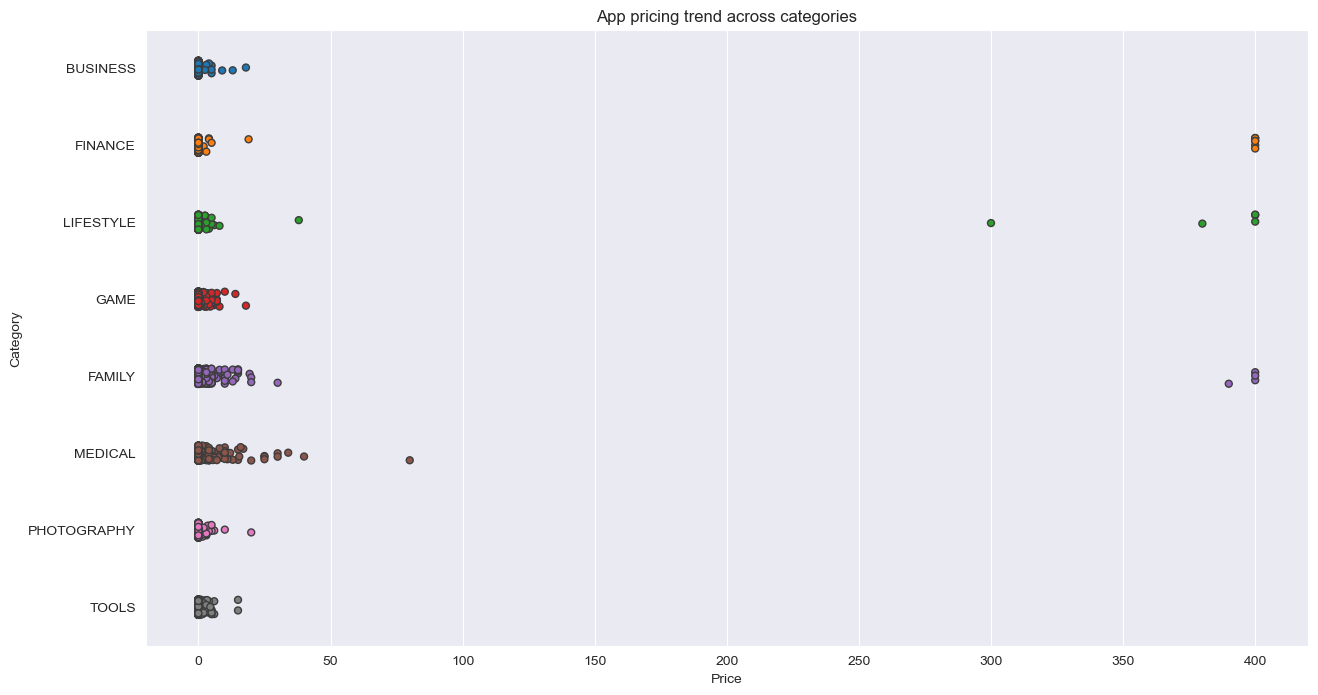

In [45]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Select a few popular app categories
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# Examine the price trend by plotting Price vs Category
ax = sns.stripplot(x = popular_app_cats['Price'], y = popular_app_cats['Category'], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

# Apps whose Price is greater than 200
apps_above_200 = popular_app_cats[['Category', 'App', 'Price']][popular_app_cats['Price'] > 200]
apps_above_200

## Filter out "junk" apps
<p>It looks like a bunch of the really expensive apps are "junk" apps. That is, apps that don't really have a purpose. Some app developer may create an app called <em>I Am Rich Premium</em> or <em>most expensive app (H)</em> just for a joke or to test their app development skills. Some developers even do this with malicious intent and try to make money by hoping people accidentally click purchase on their app in the store.</p>
<p>Let's filter out these junk apps and re-do our visualization. The distribution of apps under \$20 becomes clearer.</p>

Text(0.5, 1.0, 'App pricing trend across categories after filtering for junk apps')

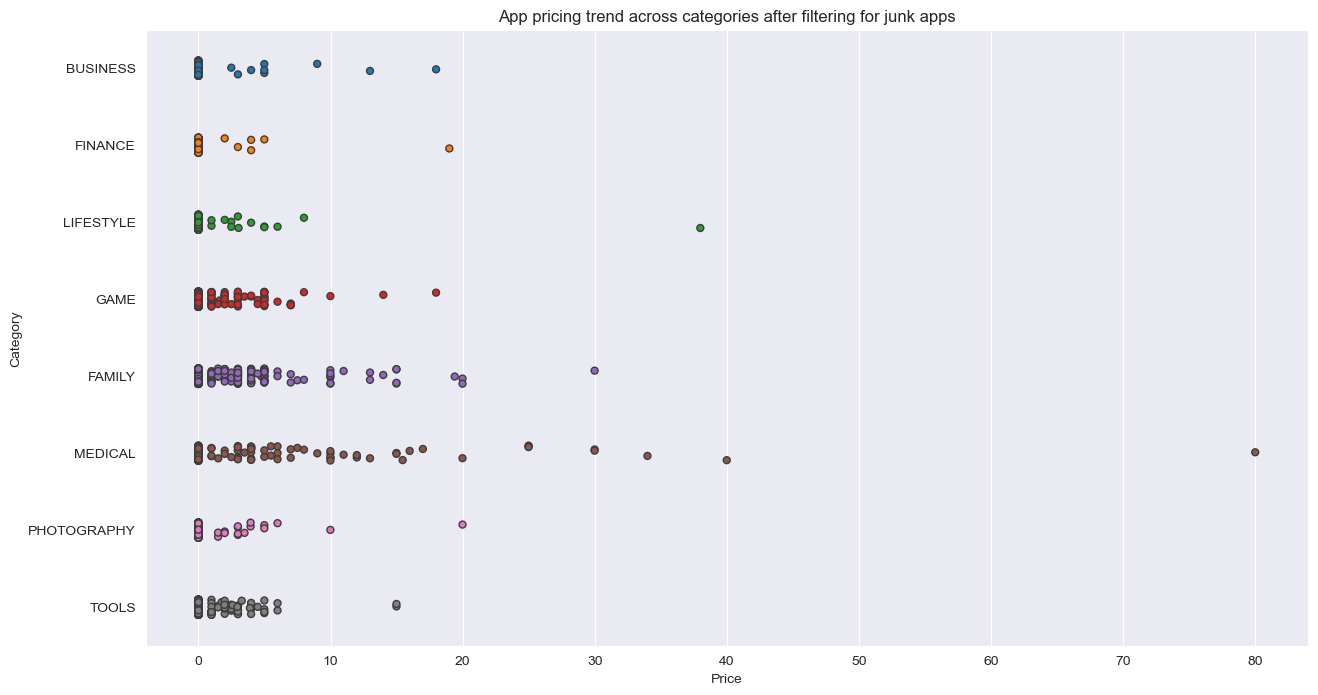

In [46]:
# Select apps priced below $100
apps_under_100 = popular_app_cats[popular_app_cats['Price'] < 100]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Examine price vs category with the authentic apps
ax = sns.stripplot(x = 'Price', y = 'Category', data=apps_under_100,
                   jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories after filtering for junk apps')

In [47]:
apps

App            Category  \
0                  "i DT" Fútbol. Todos Somos Técnicos.      ART_AND_DESIGN   
1                         +Download 4 Instagram Twitter      ART_AND_DESIGN   
2                            - Free Comics - Comic Apps      ART_AND_DESIGN   
3                                                    .R      ART_AND_DESIGN   
4                                                /u/app      ART_AND_DESIGN   
...                                                 ...                 ...   
9645                    パーリーゲイツ公式通販｜EJ STYLE（イージェイスタイル）             FINANCE   
9646                                        中国語 AQリスニング            BUSINESS   
9647  乐屋网: Buying a house, selling a house, renting ...  HEALTH_AND_FITNESS   
9649                                            哈哈姆特不EY            BUSINESS   
9650                                             日本AV历史            BUSINESS   

      Size  Price  Installs  Rating  Type  Reviews  
0     19.0   0.00     10000     4.1  Free      159  
1     14.0   0.00    500000     3.9  Free      967  
2      8.7   0.00   5000000     4.7  Free    87510  
3     25.0   0.00  50000000     4.5  Free   215644  
4      2.8   0.00    100000     4.3  Free      967  
...    ...    ...       ...     ...   ...      ...  
9645   1.5   0.00     10000     4.3  Free       95  
9646  21.0   0.00      1000     3.5  Free       13  
9647  34.0   6.99     10000     4.7  Paid      416  
9649   8.9   0.00      1000     2.6  Free       13  
9650  19.0   0.00       100     4.2  Free        8  

[8009 rows x 8 columns]

## 8. Popularity of paid apps vs free apps
<p>For apps in the Play Store today, there are five types of pricing strategies: free, freemium, paid, paymium, and subscription. Let's focus on free and paid apps only. Some characteristics of free apps are:</p>
<ul>
<li>Free to download.</li>
<li>Main source of income often comes from advertisements.</li>
<li>Often created by companies that have other products and the app serves as an extension of those products.</li>
<li>Can serve as a tool for customer retention, communication, and customer service.</li>
</ul>
<p>Some characteristics of paid apps are:</p>
<ul>
<li>Users are asked to pay once for the app to download and use it.</li>
<li>The user can't really get a feel for the app before buying it.</li>
</ul>
<p>Are paid apps are installed as much as free apps? It turns out that paid apps have a relatively lower number of installs than free apps, though the difference is not as stark as I would have expected!</p>

In [48]:
trace0 = go.Box(
    # Data for paid apps
    y=apps[apps['Type'] == 'Paid']['Installs'],
    name = 'Paid'
)

trace1 = go.Box(
    # Data for free apps
    y=apps[apps['Type'] == 'Free']['Installs'],
    name = 'Free'
)

layout = go.Layout(
    title = "Number of downloads of paid apps vs. free apps",
    yaxis = dict(
        type = 'log',
        autorange = True
    )
)

# Add trace0 and trace1 to a list for plotting
data = [trace0,trace1]
plotly.offline.iplot({'data': data, 'layout': layout})

Are paid apps are installed as much as free apps? It turns out that paid apps have a relatively lower number of installs than free apps, though the difference is not as stark as I would have expected!

## 9. Sentiment analysis of user reviews
<p>Mining user review data to determine how people feel about your product, brand, or service can be done using a technique called sentiment analysis. User reviews for apps can be analyzed to identify if the mood is positive, negative or neutral about that app. For example, positive words in an app review might include words such as 'amazing', 'friendly', 'good', 'great', and 'love'. Negative words might be words like 'malware', 'hate', 'problem', 'refund', and 'incompetent'.</p>
<p>By plotting sentiment polarity scores of user reviews for paid and free apps, we observe that free apps receive a lot of harsh comments, as indicated by the outliers on the negative y-axis. Reviews for paid apps appear never to be extremely negative. This may indicate something about app quality, i.e., paid apps being of higher quality than free apps on average. The median polarity score for paid apps is a little higher than free apps, thereby syncing with our previous observation.</p>
<p>In this notebook, we analyzed over ten thousand apps from the Google Play Store. We can use our findings to inform our decisions should we ever wish to create an app ourselves.</p>

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

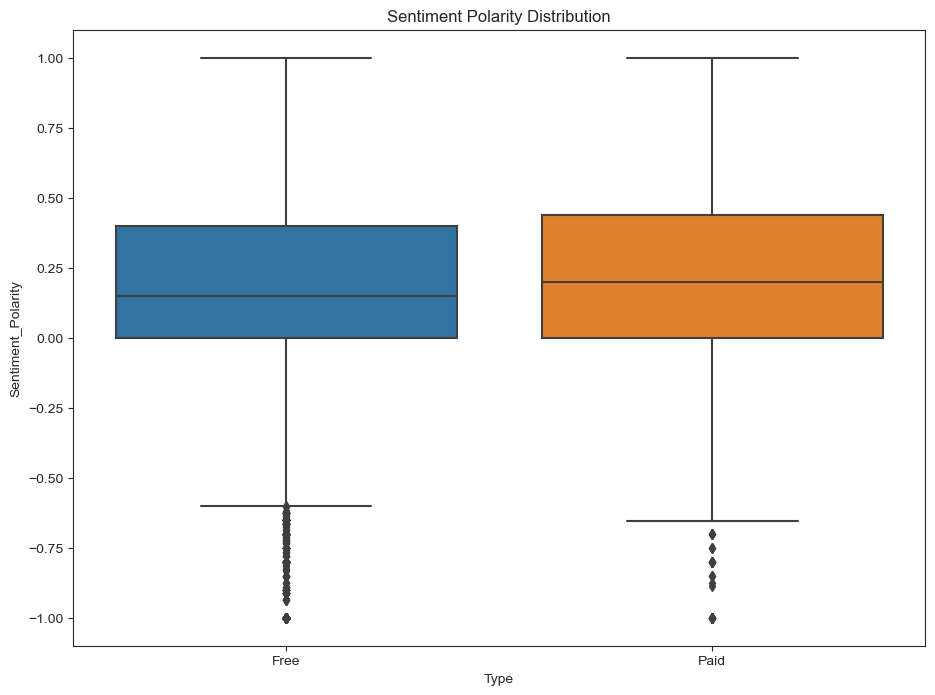

In [49]:
# Load user_reviews.csv
reviews_df = pd.read_csv('user_reviews.csv')

# Join and merge the two dataframe
merged_df = pd.merge(apps, reviews_df, on = 'App', how = "inner")

# Drop NA values from Sentiment and Translated_Review columns
merged_df = merged_df.dropna(subset=['Sentiment', 'Translated_Review'])

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x = 'Type', y = 'Sentiment_Polarity', data = merged_df)
ax.set_title('Sentiment Polarity Distribution')

By plotting sentiment polarity scores of user reviews for paid and free apps, we observe that free apps receive a lot of harsh comments, as indicated by the outliers on the negative y-axis. Reviews for paid apps appear never to be extremely negative. This may indicate something about app quality, i.e., paid apps being of higher quality than free apps on average. The median polarity score for paid apps is a little higher than free apps, thereby syncing with our previous observation.